Credit Card Approval Prediction9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application_record = pd.read_csv("D:/Medium/3 Learned/Credit Card Approval Prediction/application_record.csv")
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
application_record.shape

(438557, 18)

In [4]:
application_record['ID'].nunique()

438510

There are 438,510 unique customers on whom we have demographic data

In [5]:
credit_record = pd.read_csv("D:/Medium/3 Learned/Credit Card Approval Prediction/credit_record.csv")
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
credit_record.shape

(1048575, 3)

In [7]:
credit_record['ID'].nunique()

45985


    There are 45,985 unique customers on whom we have credit score/status data
    On average we have 22.8 months worth of records/score/status on each of these 46 thousand customers (see below cell)


In [8]:
credit_record.shape[0]/credit_record['ID'].nunique()

22.802544307926496

In [9]:
credit_record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [10]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [11]:
application_record.head().T

,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


In [12]:
application_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [13]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [14]:
application_record.isnull().sum()/application_record.shape[0]

ID                     0.00000
CODE_GENDER            0.00000
FLAG_OWN_CAR           0.00000
FLAG_OWN_REALTY        0.00000
CNT_CHILDREN           0.00000
AMT_INCOME_TOTAL       0.00000
NAME_INCOME_TYPE       0.00000
NAME_EDUCATION_TYPE    0.00000
NAME_FAMILY_STATUS     0.00000
NAME_HOUSING_TYPE      0.00000
DAYS_BIRTH             0.00000
DAYS_EMPLOYED          0.00000
FLAG_MOBIL             0.00000
FLAG_WORK_PHONE        0.00000
FLAG_PHONE             0.00000
FLAG_EMAIL             0.00000
OCCUPATION_TYPE        0.30601
CNT_FAM_MEMBERS        0.00000
dtype: float64

30% of values in OCCUPATION_TYPE are missing

In [15]:
application_record['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

<AxesSubplot:>

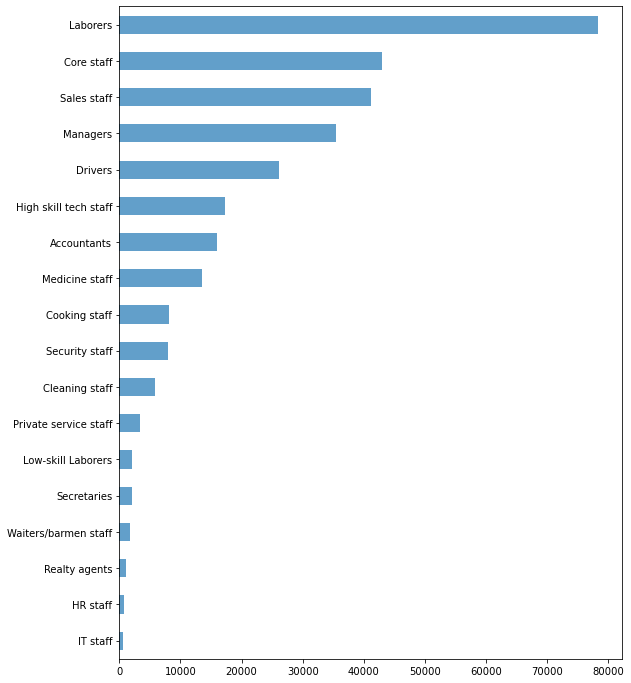

In [16]:
application_record['OCCUPATION_TYPE'].value_counts().sort_values().plot(kind='barh', figsize=(9,12), alpha=0.7)

    since the column OCCUPATION_TYPE has varied values it is hard to go for a median kind of value to fill the missing values. so drop the column

In [17]:
application_record.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [18]:
application_record.head().T

,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


In [19]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [20]:
# how many customers instances are there when customer had no loan (20% approx)
credit_record.loc[credit_record['STATUS'] == 'X'].shape[0]/credit_record.shape[0]

0.1995374675154376

In [21]:
# how many customers instances are there when customer had paid off (42% approx)
credit_record.loc[credit_record['STATUS'] == 'C'].shape[0]/credit_record.shape[0]

0.42155401378060703


    so we are left with approx 40% customer months when a customer credit score is 0 to 5. looks like a fairly balanced data
    it is balanced if you consider all codes 0 to 5 as belonging to another class (default). if you select just 3 to 5 for example then the dataset is highly imbalanced


In [22]:
credit_record['STATUS'].value_counts()/credit_record.shape[0]*100

C    42.155401
0    36.537205
X    19.953747
1     1.057626
5     0.161457
2     0.082779
3     0.030518
4     0.021267
Name: STATUS, dtype: float64

In [23]:
# code for all defaulters in credit_record. lets say that those who defaulted on their installment by more than 0 days is a defaulter
defaulter_codes= ['0','1','2','3','4','5']

In [24]:
# data labelling. 1 is a defaulter 0 is not
credit_record['Label'] = np.where(credit_record.STATUS.isin(defaulter_codes), 1, 0)

In [25]:
credit_record.head(10)

,ID,MONTHS_BALANCE,STATUS,Label
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,1
3,5001711,-3,0,1
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


In [26]:
credit_record.drop('STATUS', axis=1, inplace=True)
# since we do not need this column now

In [27]:
credit_record.head()

,ID,MONTHS_BALANCE,Label
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0


In [28]:
credit_record['Label'].value_counts()

0    651261
1    397314
Name: Label, dtype: int64

Join customer_record with application_record. Name the new table as record

In [29]:
print('application_record', application_record.shape)
print('credit_record',credit_record.shape)

application_record (438557, 17)
credit_record (1048575, 3)


In [30]:
record = pd.merge(credit_record, application_record, on='ID', how='left')
record.head()

,ID,MONTHS_BALANCE,Label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5001711,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001711,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001711,-2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001711,-3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001712,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
record.shape

(1048575, 19)

In [32]:
record.sample(5).T

,140802,509340,104986,499488,737000
ID,5011470,5061379,5009554,5060975,5100376
MONTHS_BALANCE,-10,-31,-17,-27,-53
Label,0,0,0,0,0
CODE_GENDER,NaN,F,F,NaN,F
FLAG_OWN_CAR,NaN,Y,N,NaN,Y
FLAG_OWN_REALTY,NaN,Y,N,NaN,Y
CNT_CHILDREN,NaN,0.0,0.0,NaN,0.0
AMT_INCOME_TOTAL,NaN,247500.0,198000.0,NaN,270000.0
NAME_INCOME_TYPE,NaN,Working,Commercial associate,NaN,State servant
NAME_EDUCATION_TYPE,NaN,Secondary / secondary special,Secondary / secondary special,NaN,Higher education


In [33]:
record.isnull().sum()
# We need to drop rows where columns have null values

ID                          0
MONTHS_BALANCE              0
Label                       0
CODE_GENDER            270860
FLAG_OWN_CAR           270860
FLAG_OWN_REALTY        270860
CNT_CHILDREN           270860
AMT_INCOME_TOTAL       270860
NAME_INCOME_TYPE       270860
NAME_EDUCATION_TYPE    270860
NAME_FAMILY_STATUS     270860
NAME_HOUSING_TYPE      270860
DAYS_BIRTH             270860
DAYS_EMPLOYED          270860
FLAG_MOBIL             270860
FLAG_WORK_PHONE        270860
FLAG_PHONE             270860
FLAG_EMAIL             270860
CNT_FAM_MEMBERS        270860
dtype: int64

In [34]:
record.dropna(inplace=True)

In [35]:
record.head()

,ID,MONTHS_BALANCE,Label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,5008804,0,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,5008804,-1,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92940,5008804,-2,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92941,5008804,-3,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92942,5008804,-4,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0


In [36]:
record.shape

(777715, 19)

In [37]:
record['Label'].value_counts()

0    475486
1    302229
Name: Label, dtype: int64

    So this is how our dataset is labelled: 0.3 million with label 1 (default status) 0.47 million with label 0. That is about 60:40 ratio

VISUALISATION

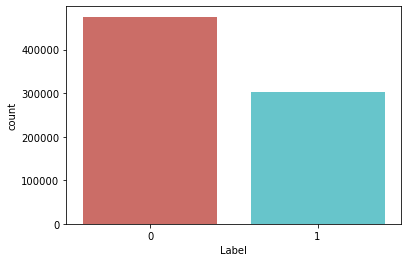

In [38]:
chart=sns.countplot(x='Label', data = record, palette = 'hls')

Text(0, 0.5, 'Number of Defaulters')

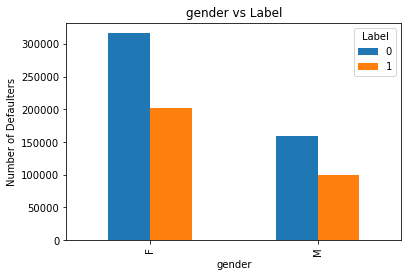

In [39]:
pd.crosstab(record.CODE_GENDER,record.Label).plot(kind='bar')
plt.title('gender vs Label')
plt.xlabel('gender')
plt.ylabel('Number of Defaulters')

Text(0, 0.5, 'Number of Defaulters')

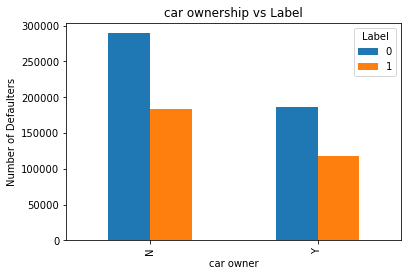

In [40]:
pd.crosstab(record.FLAG_OWN_CAR,record.Label).plot(kind='bar')
plt.title('car ownership vs Label')
plt.xlabel('car owner')
plt.ylabel('Number of Defaulters')

Text(0, 0.5, 'Number of Defaulters')

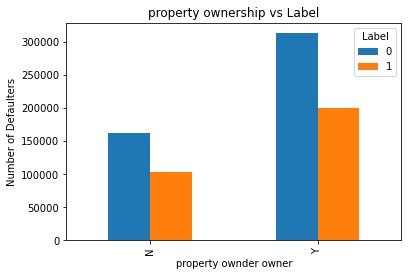

In [41]:
pd.crosstab(record.FLAG_OWN_REALTY,record.Label).plot(kind='bar')
plt.title('property ownership vs Label')
plt.xlabel('property ownder owner')
plt.ylabel('Number of Defaulters')

Text(0, 0.5, 'Number of Defaulters')

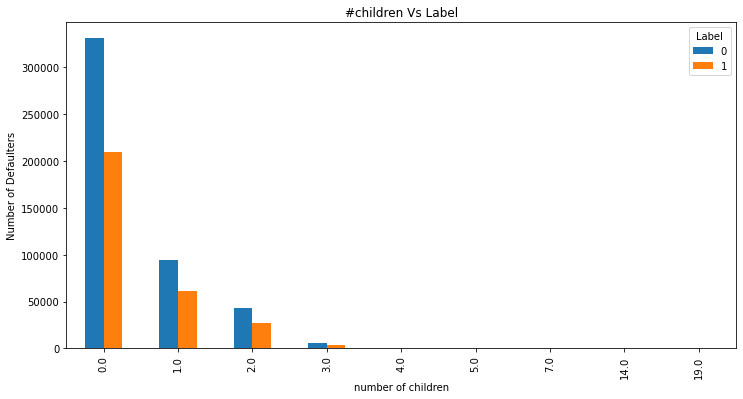

In [42]:
pd.crosstab(record.CNT_CHILDREN, record.Label).plot(kind='bar', figsize=(12,6))
plt.title('#children Vs Label')
plt.xlabel('number of children')
plt.ylabel('Number of Defaulters')

Text(0, 0.5, 'number of defaulters')

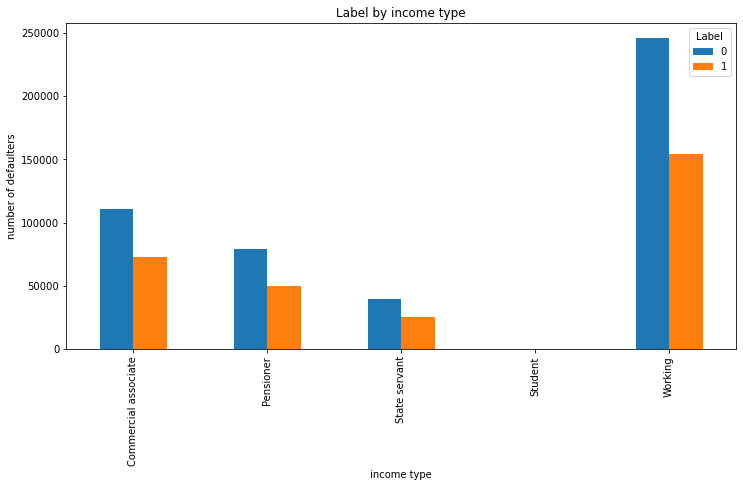

In [43]:
pd.crosstab(record.NAME_INCOME_TYPE, record.Label).plot(kind='bar', figsize=(12,6))
plt.title('Label by income type')
plt.xlabel('income type')
plt.ylabel('number of defaulters')

In [44]:
pd.crosstab(record.NAME_INCOME_TYPE, record.Label)

Label,0,1
NAME_INCOME_TYPE,,
Commercial associate,110818,72567
Pensioner,78894,49498
State servant,39906,25531
Student,269,68
Working,245599,154565


Text(0.5, 1.0, 'education type vs label')

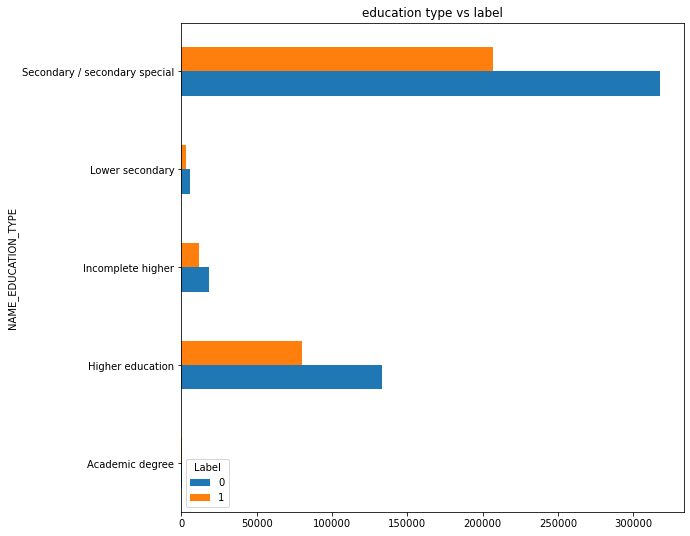

In [45]:
pd.crosstab(record.NAME_EDUCATION_TYPE, record.Label).plot(kind='barh', figsize=(9,9))
plt.title('education type vs label')

In [46]:
record.columns

Index(['ID', 'MONTHS_BALANCE', 'Label', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

Text(0.5, 1.0, 'FAMILY_STATUS versus Label')

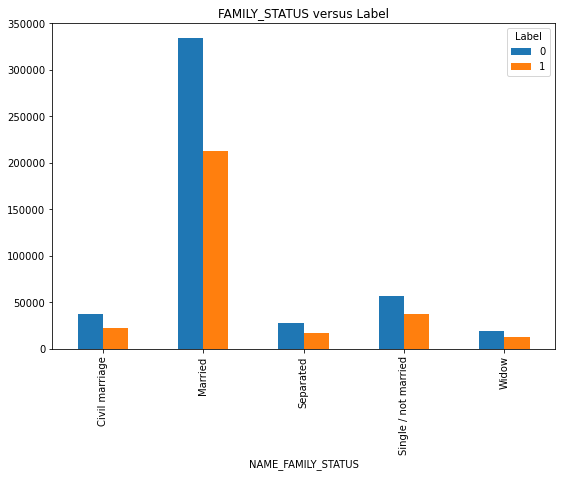

In [47]:
pd.crosstab(record.NAME_FAMILY_STATUS, record.Label).plot(kind='bar', figsize=(9,6))
plt.title('FAMILY_STATUS versus Label')

Text(0.5, 1.0, 'HOUSING_TYPE versus Label')

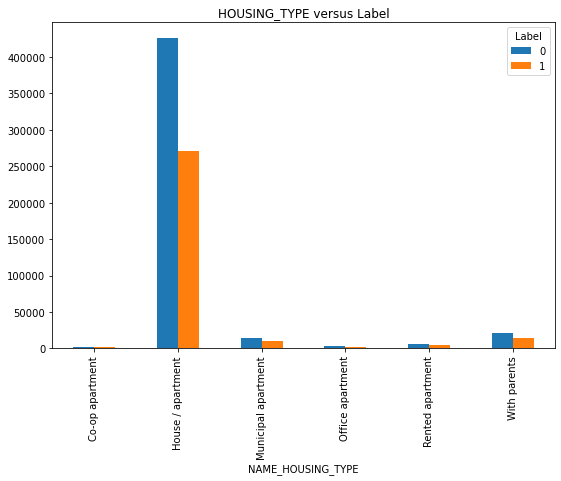

In [48]:
pd.crosstab(record.NAME_HOUSING_TYPE, record.Label).plot(kind='bar', figsize=(9,6))
plt.title('HOUSING_TYPE versus Label')

Text(0, 0.5, 'number of defaulters')

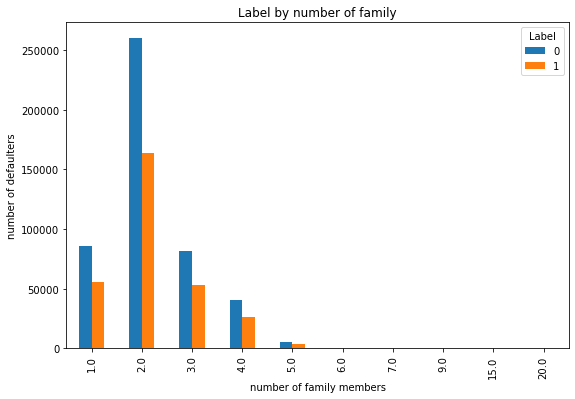

In [49]:
pd.crosstab(record.CNT_FAM_MEMBERS,record.Label).plot(kind='bar', figsize=(9,6))

plt.title('Label by number of family')
plt.xlabel('number of family members')
plt.ylabel('number of defaulters')

Text(0, 0.5, 'Number of Defaulters')

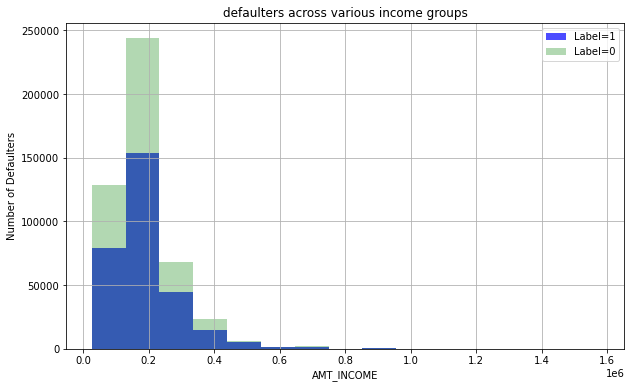

In [50]:
plt.figure(figsize=(10,6))
record[record['Label']==1]['AMT_INCOME_TOTAL'].hist(alpha=0.7,color='blue',
                                              bins=15,label='Label=1')
record[record['Label']==0]['AMT_INCOME_TOTAL'].hist(alpha=0.3,color='green',
                                                bins=15,label='Label=0')
                                                    
plt.title('defaulters across various income groups')                                                    
plt.legend()
plt.xlabel('AMT_INCOME')
plt.ylabel('Number of Defaulters')

Text(0, 0.5, 'number of defaulters')

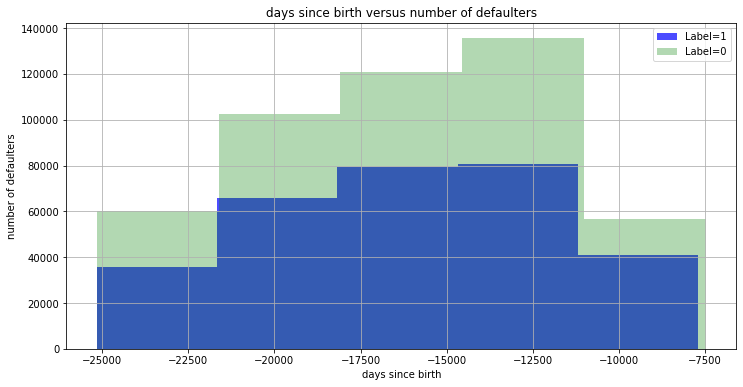

In [51]:
plt.figure(figsize=(12,6))

record[record['Label'] == 1]['DAYS_BIRTH'].hist(alpha=0.7,color='blue', bins=5,label='Label=1')
record[record['Label'] == 0]['DAYS_BIRTH'].hist(alpha=0.3,color='green', bins=5,label='Label=0')

plt.title('days since birth versus number of defaulters')
plt.legend()
plt.xlabel('days since birth')
plt.ylabel('number of defaulters')

Text(0, 0.5, 'number of defaulters')

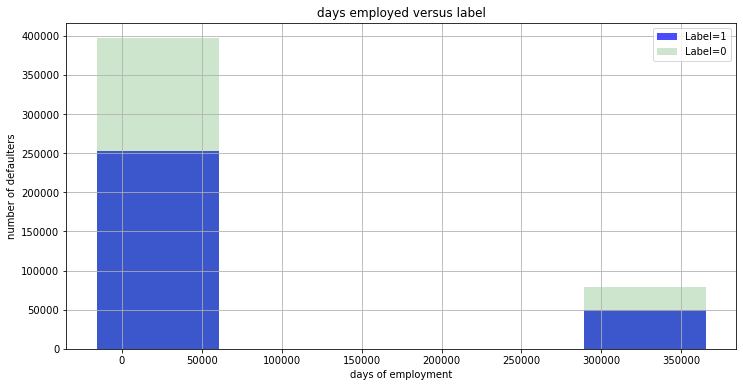

In [52]:
plt.figure(figsize=(12,6))

record[record['Label']==1]['DAYS_EMPLOYED'].hist(bins=5, alpha=0.7, color='blue', label='Label=1')
record[record['Label']==0]['DAYS_EMPLOYED'].hist(bins=5, alpha=0.2, color='green', label='Label=0')

plt.legend()
plt.title('days employed versus label')
plt.xlabel('days of employment')
plt.ylabel('number of defaulters')

In [53]:
record['ID'] = record['ID'].astype(str) + '__' + record['MONTHS_BALANCE'].astype(str)

In [54]:
record.head()

,ID,MONTHS_BALANCE,Label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,5008804__0,0,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,5008804__-1,-1,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92940,5008804__-2,-2,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92941,5008804__-3,-3,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92942,5008804__-4,-4,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0



Some attribute construction

    Adjust Days_Birth and Days_Employed. We wanted to know the age AT THE TIME the credit score for a certain month was assigned.
    income per family member


In [55]:
record['DAYS_BIRTH'] = record['DAYS_BIRTH'] - (record['MONTHS_BALANCE'])*30
record['DAYS_EMPLOYED'] = record['DAYS_EMPLOYED'] - (record['MONTHS_BALANCE'])*30

In [56]:
record.head()

,ID,MONTHS_BALANCE,Label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,5008804__0,0,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,5008804__-1,-1,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-11975.0,-4512.0,1.0,1.0,0.0,0.0,2.0
92940,5008804__-2,-2,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-11945.0,-4482.0,1.0,1.0,0.0,0.0,2.0
92941,5008804__-3,-3,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-11915.0,-4452.0,1.0,1.0,0.0,0.0,2.0
92942,5008804__-4,-4,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-11885.0,-4422.0,1.0,1.0,0.0,0.0,2.0


Text(0, 0.5, 'number of defaulters')

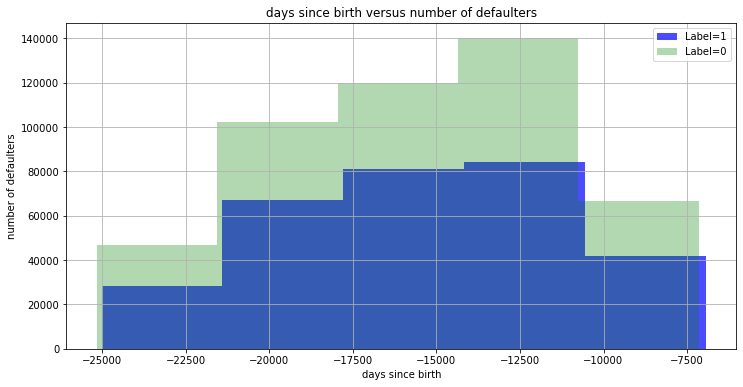

In [57]:
plt.figure(figsize=(12,6))

record[record['Label'] == 1]['DAYS_BIRTH'].hist(alpha=0.7,color='blue', bins=5,label='Label=1')
record[record['Label'] == 0]['DAYS_BIRTH'].hist(alpha=0.3,color='green', bins=5,label='Label=0')

plt.title('days since birth versus number of defaulters')
plt.legend()
plt.xlabel('days since birth')
plt.ylabel('number of defaulters')

In [58]:
record['INCOME_PER_MEMBER'] = record['AMT_INCOME_TOTAL']/record['CNT_FAM_MEMBERS']

Text(0, 0.5, 'number of defaulters')

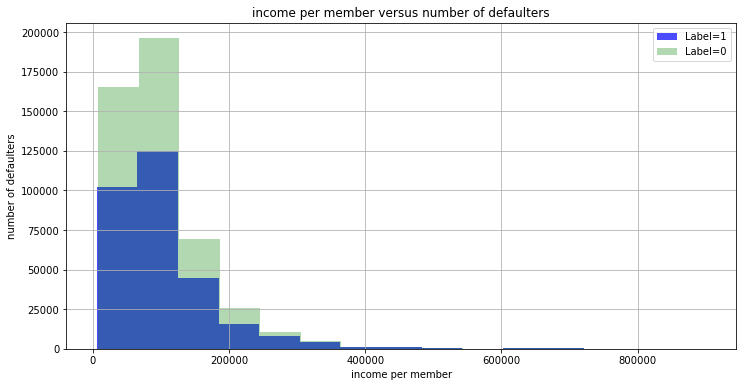

In [59]:
plt.figure(figsize=(12,6))

record[record['Label'] == 1]['INCOME_PER_MEMBER'].hist(alpha=0.7,color='blue', bins=15,label='Label=1')
record[record['Label'] == 0]['INCOME_PER_MEMBER'].hist(alpha=0.3,color='green', bins=15,label='Label=0')

plt.title('income per member versus number of defaulters')
plt.legend()
plt.xlabel('income per member')
plt.ylabel('number of defaulters')

Dummify categorical data

In [60]:
record.columns

Index(['ID', 'MONTHS_BALANCE', 'Label', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'INCOME_PER_MEMBER'],
      dtype='object')

In [61]:
record = pd.get_dummies(record, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
                                         'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], drop_first = False)

In [62]:
record.head().T 

,92938,92939,92940,92941,92942
ID,5008804__0,5008804__-1,5008804__-2,5008804__-3,5008804__-4
MONTHS_BALANCE,0,-1,-2,-3,-4
Label,0,0,0,0,0
CNT_CHILDREN,0.0,0.0,0.0,0.0,0.0
AMT_INCOME_TOTAL,427500.0,427500.0,427500.0,427500.0,427500.0
DAYS_BIRTH,-12005.0,-11975.0,-11945.0,-11915.0,-11885.0
DAYS_EMPLOYED,-4542.0,-4512.0,-4482.0,-4452.0,-4422.0
FLAG_MOBIL,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,1.0,1.0,1.0,1.0,1.0
FLAG_PHONE,0.0,0.0,0.0,0.0,0.0


month balance column should be dropped becaquse it gives a false ordinal signal. one issue if we do that: there could be multiple lables for the same example. but we have resolved that by re-working employment and age at the time the credit score is awarded. so months balance column can now be dropped. 

In [63]:
record.drop('MONTHS_BALANCE', axis=1, inplace=True)

In [64]:
record.head().T

,92938,92939,92940,92941,92942
ID,5008804__0,5008804__-1,5008804__-2,5008804__-3,5008804__-4
Label,0,0,0,0,0
CNT_CHILDREN,0.0,0.0,0.0,0.0,0.0
AMT_INCOME_TOTAL,427500.0,427500.0,427500.0,427500.0,427500.0
DAYS_BIRTH,-12005.0,-11975.0,-11945.0,-11915.0,-11885.0
DAYS_EMPLOYED,-4542.0,-4512.0,-4482.0,-4452.0,-4422.0
FLAG_MOBIL,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,1.0,1.0,1.0,1.0,1.0
FLAG_PHONE,0.0,0.0,0.0,0.0,0.0
FLAG_EMAIL,0.0,0.0,0.0,0.0,0.0


Scaling

In [65]:
record_before_scaling = record.copy()

In [66]:
scalable_cols = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'INCOME_PER_MEMBER']

In [67]:
from sklearn import preprocessing

In [68]:
#create RobustScaler object
scaler = preprocessing.RobustScaler()

In [69]:
record[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'INCOME_PER_MEMBER']] = scaler.fit_transform(record[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'INCOME_PER_MEMBER']])

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


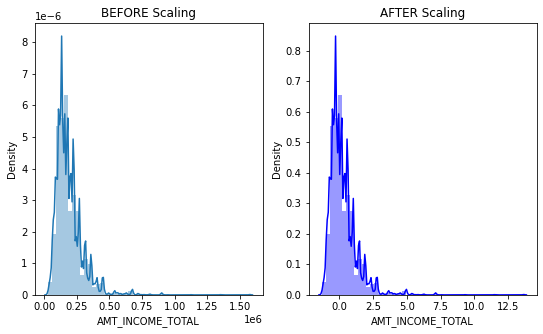

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


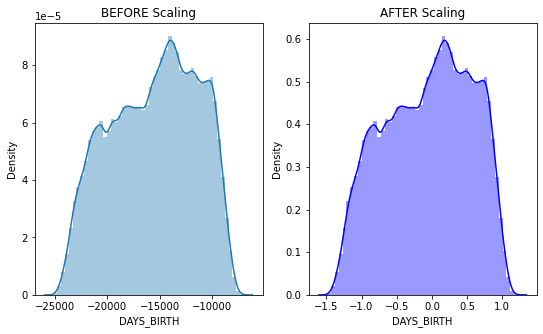

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


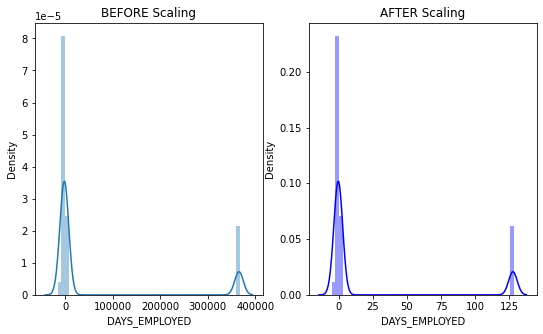

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


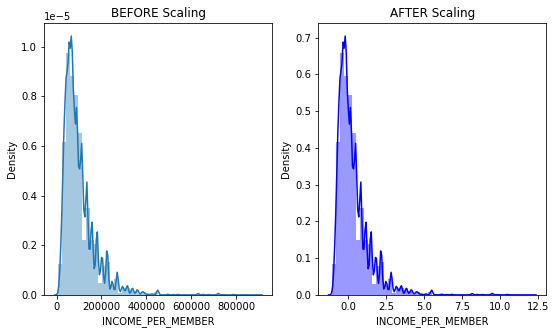

In [70]:
for variable in scalable_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))

    ax1.set_title('BEFORE Scaling')
    sns.distplot(record_before_scaling[variable], ax=ax1)

    ax2.set_title('AFTER Scaling')
    sns.distplot(record[variable], ax=ax2, color='b')

    plt.show()

In [71]:
record.head().T

,92938,92939,92940,92941,92942
ID,5008804__0,5008804__-1,5008804__-2,5008804__-3,5008804__-4
Label,0,0,0,0,0
CNT_CHILDREN,0.0,0.0,0.0,0.0,0.0
AMT_INCOME_TOTAL,2.565217,2.565217,2.565217,2.565217,2.565217
DAYS_BIRTH,0.468875,0.473332,0.477789,0.482246,0.486703
DAYS_EMPLOYED,-1.182609,-1.172174,-1.161739,-1.151304,-1.14087
FLAG_MOBIL,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,1.0,1.0,1.0,1.0,1.0
FLAG_PHONE,0.0,0.0,0.0,0.0,0.0
FLAG_EMAIL,0.0,0.0,0.0,0.0,0.0


In [72]:
record.isnull().sum()

ID                                                   0
Label                                                0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
INCOME_PER_MEMBER                                    0
CODE_GENDER_F                                        0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_N                                       0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_N                                    0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOM

In [73]:
record.groupby('Label').mean().transpose()

Label,0,1
CNT_CHILDREN,0.426071,0.431246
AMT_INCOME_TOTAL,0.242679,0.277923
DAYS_BIRTH,-0.062748,-0.047599
DAYS_EMPLOYED,20.797634,20.534342
FLAG_MOBIL,1.000000,1.000000
FLAG_WORK_PHONE,0.234638,0.227381
FLAG_PHONE,0.299506,0.303260
FLAG_EMAIL,0.089029,0.095838
CNT_FAM_MEMBERS,2.208174,2.209881
INCOME_PER_MEMBER,0.306999,0.344547


In [74]:
record.columns

Index(['ID', 'Label', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'INCOME_PER_MEMBER', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_

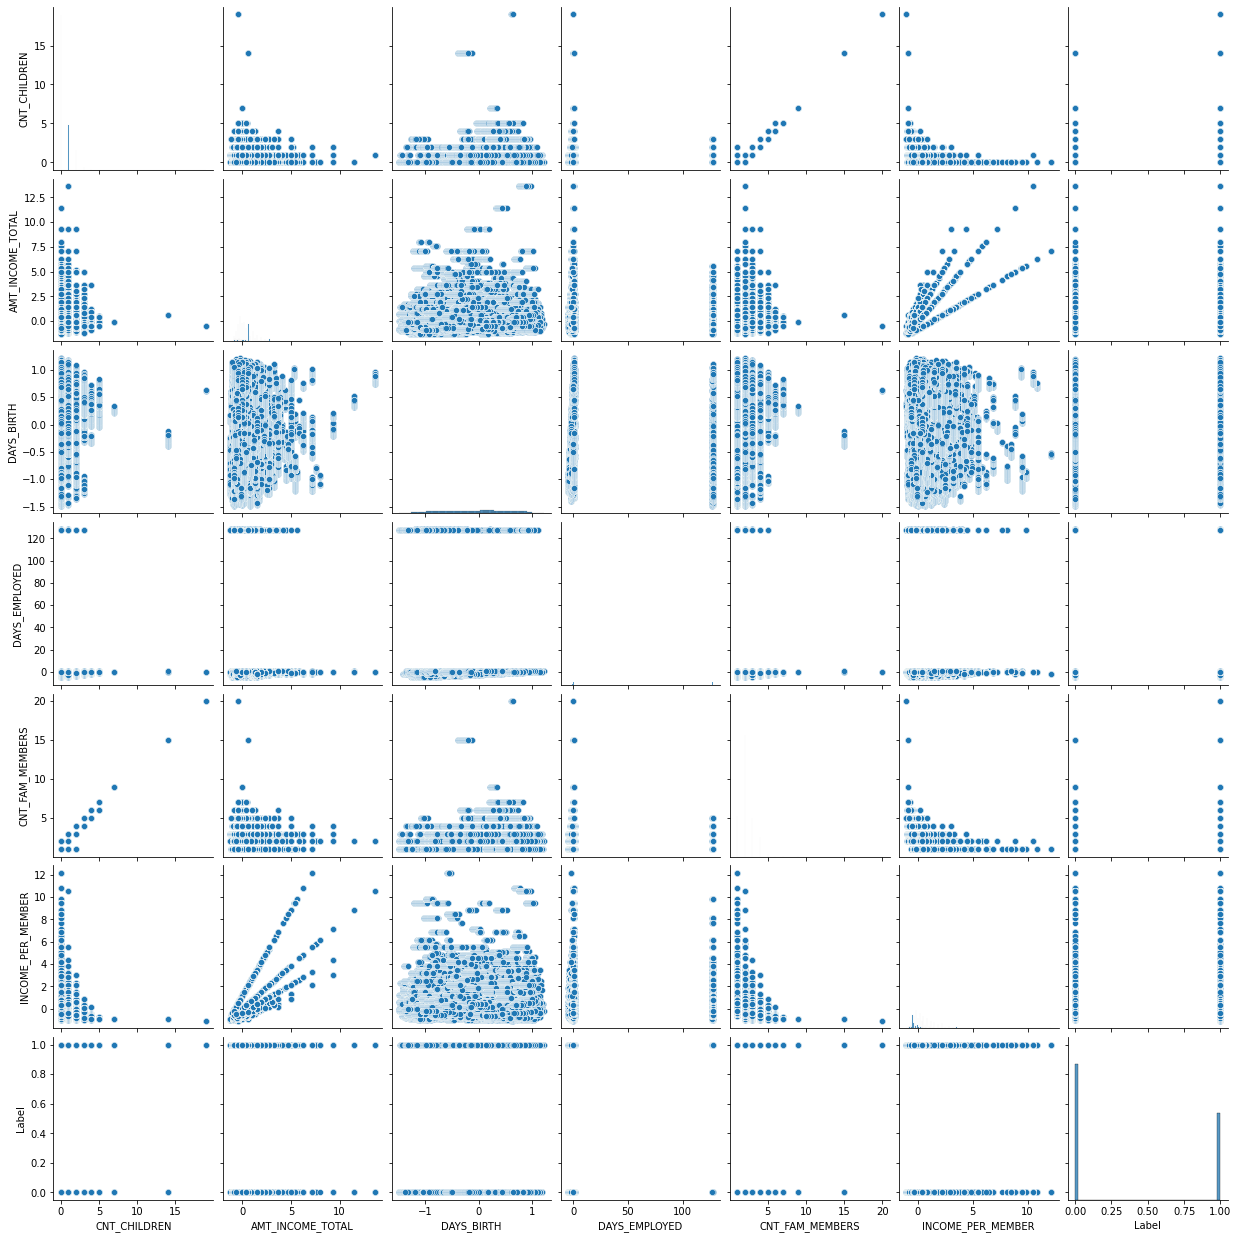

In [75]:
sns.pairplot(record[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'INCOME_PER_MEMBER','Label']])

<AxesSubplot:>

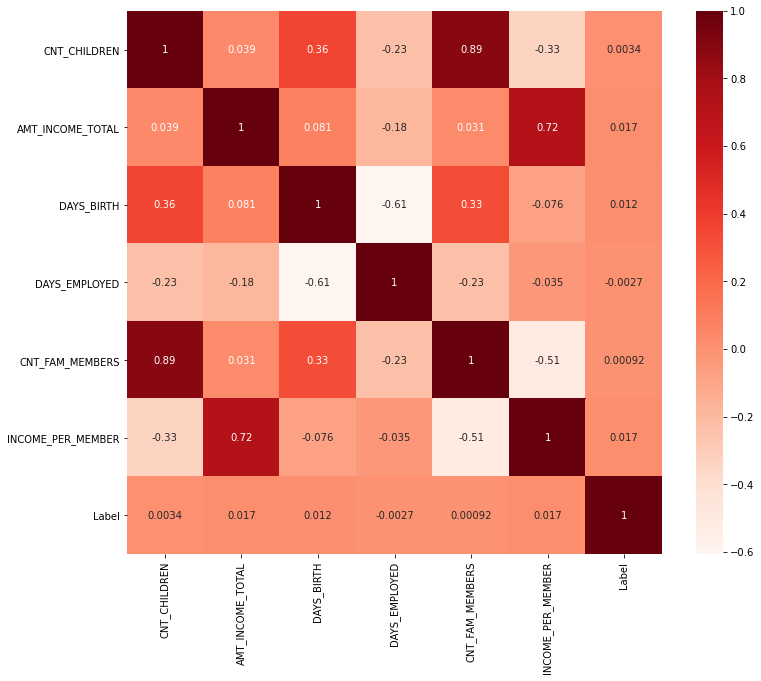

In [76]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))

corr = record[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'INCOME_PER_MEMBER','Label']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap=plt.cm.Reds)

In [77]:
record.corr()['Label'].sort_values(ascending=False)

Label                                                1.000000
AMT_INCOME_TOTAL                                     0.017497
NAME_EDUCATION_TYPE_Secondary / secondary special    0.017420
INCOME_PER_MEMBER                                    0.017159
DAYS_BIRTH                                           0.012091
FLAG_EMAIL                                           0.011502
NAME_INCOME_TYPE_Commercial associate                0.008088
NAME_FAMILY_STATUS_Widow                             0.006137
NAME_FAMILY_STATUS_Single / not married              0.005125
FLAG_PHONE                                           0.003989
CNT_CHILDREN                                         0.003382
CODE_GENDER_F                                        0.002718
NAME_HOUSING_TYPE_Municipal apartment                0.002600
FLAG_OWN_REALTY_Y                                    0.001623
NAME_EDUCATION_TYPE_Incomplete higher                0.001605
NAME_HOUSING_TYPE_Rented apartment                   0.001232
NAME_INC

<AxesSubplot:>

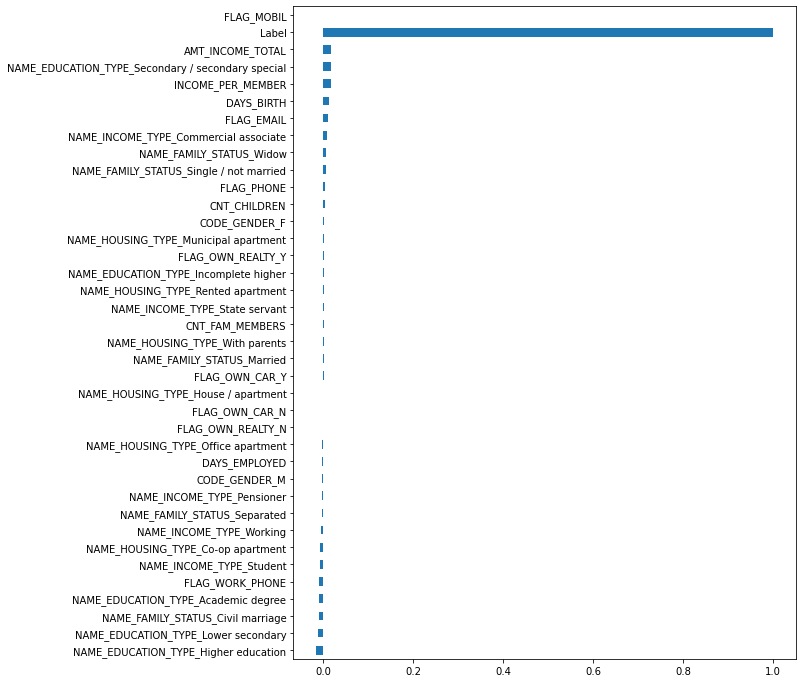

In [78]:
record.corr()['Label'].sort_values(ascending=True).plot(kind='barh', figsize=(9,12))

Model

In [79]:
record.columns

Index(['ID', 'Label', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'INCOME_PER_MEMBER', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_

In [80]:
Features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'INCOME_PER_MEMBER',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents']

using about 100k examples from the dataset

In [81]:
record['Label'].value_counts()

0    475486
1    302229
Name: Label, dtype: int64

In [82]:
record_sample = record.sample(100000)

In [83]:
record_sample['Label'].value_counts()

0    61252
1    38748
Name: Label, dtype: int64

Train Test split

In [84]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

train, test = train_test_split(record_sample, test_size = 0.3, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[Features]
label_train = train['Label']
features_test = test[Features]
label_test = test['Label']

Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)


print("{:.2f}".format(accuracy_train),"{:.2f}".format(accuracy_test))

0.96 0.70


In [86]:
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,14166,4192
1,4912,6730


In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy Score')
print(accuracy_score(label_test, pred_test),'\n')

print('Precision Score')
print(precision_score(label_test, pred_test,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix(label_test, pred_test)
columns = ['Non Defaulter','Defaulter'] 
print(pd.DataFrame(array,columns = columns, index = columns),'\n')

print('Classification Report')
print(classification_report(label_test, pred_test),'\n')

Accuracy Score
0.6965333333333333 

Precision Score
[0.74253066 0.61618751] 

Confusion Matrix
               Non Defaulter  Defaulter
Non Defaulter          14166       4192
Defaulter               4912       6730 

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.76     18358
           1       0.62      0.58      0.60     11642

    accuracy                           0.70     30000
   macro avg       0.68      0.67      0.68     30000
weighted avg       0.69      0.70      0.69     30000
 



Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(features_train, label_train)

# predict train set
pred_train=tree.predict(features_train)
# predict test set
pred_test=tree.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)


print("{:.2f}".format(accuracy_train),"{:.2f}".format(accuracy_test))

0.96 0.65


In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy Score')
print(accuracy_score(label_test, pred_test),'\n')

print('Precision Score')
print(precision_score(label_test, pred_test,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix(label_test, pred_test)
columns = ['Non Defaulter','Defaulter']  
print(pd.DataFrame(array,columns = columns, index = columns),'\n')

print('Classification Report')
print(classification_report(label_test, pred_test),'\n')

Accuracy Score
0.6537666666666667 

Precision Score
[0.70817446 0.55780746] 

Confusion Matrix
               Non Defaulter  Defaulter
Non Defaulter          13558       4800
Defaulter               5587       6055 

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.74      0.72     18358
           1       0.56      0.52      0.54     11642

    accuracy                           0.65     30000
   macro avg       0.63      0.63      0.63     30000
weighted avg       0.65      0.65      0.65     30000
 



<AxesSubplot:title={'center':'Decision Tree Classifier\nFeature Importances'}, ylabel='features'>

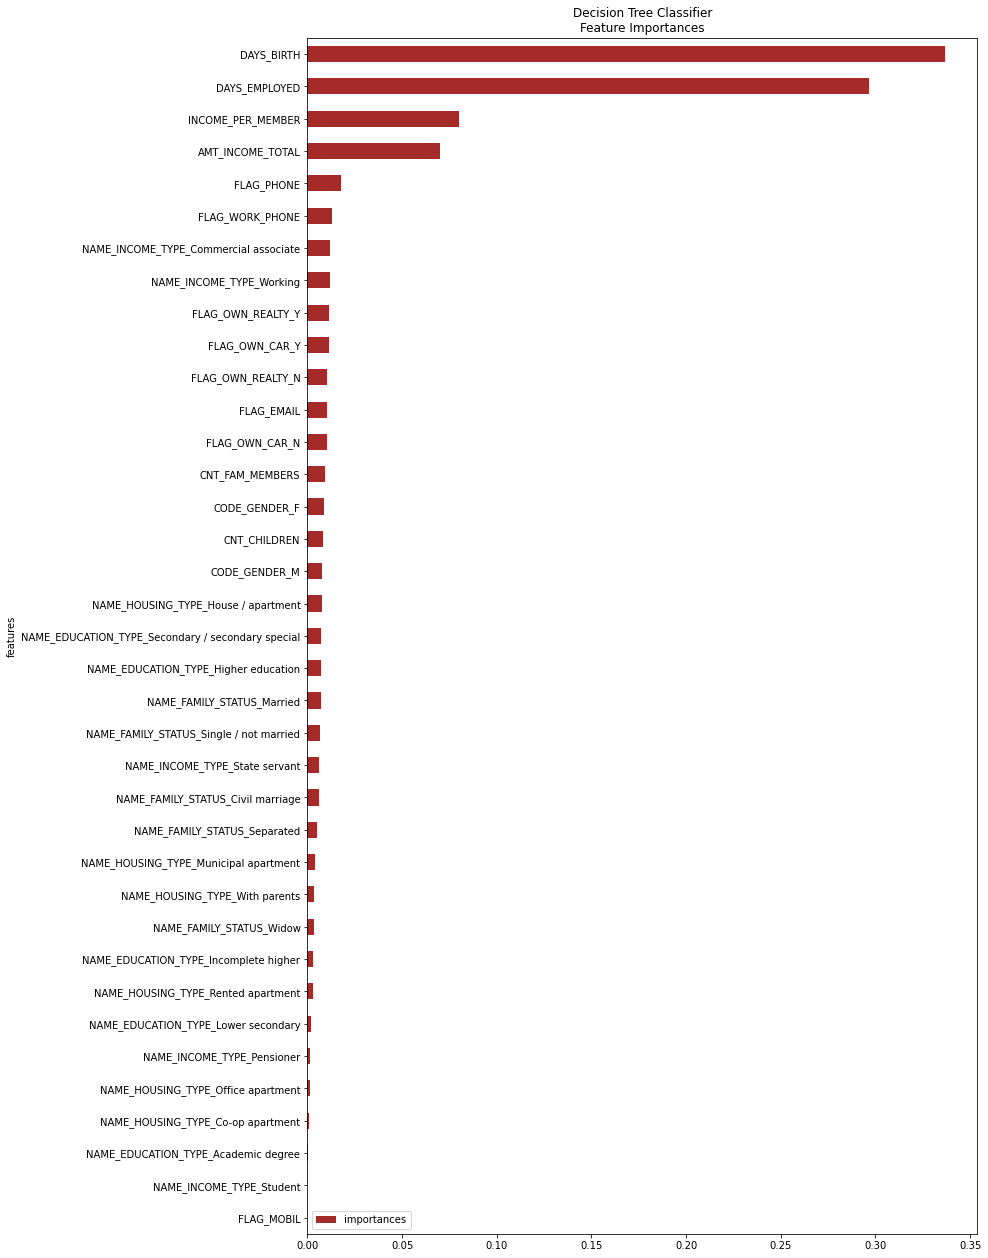

In [90]:
dfz=pd.DataFrame({'features':features_train.columns,'importances':tree.feature_importances_})
dfz.sort_values('importances',inplace=True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importances',x='features',color='brown', figsize=(12,22))